**-------------------------------------------------**  
**Salma Almazán Barajas**  
**Diana Laura Equihua Díaz**  
*Examen de la unidad 2 de Inteligencia Artificial*  
**-------------------------------------------------**


## Conjunto de datos 1

- Simplificación el conjunto de datos para trabajar solo con dos variables,
profundidad del océano (Depthm) y temperatura (T_degC), para despues revisar si 
existe una correlación visible para después desarrollar el modelo de regresión.

In [267]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


- Se realiza la carga de los datos 

In [206]:
data = pd.read_csv("DataSet1.csv")
data.head(5)

/var/folders/tv/dnbkyg2n2pv48smyjdzp6qf00000gn/T/ipykernel_5225/3695294637.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("DataSet1.csv")


,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Se realizará la graficacion de estas dos variables con heatmap

In [207]:
path = data[["Depthm","T_degC"]]

In [208]:
path.isna().sum()

Depthm        0
T_degC    10963
dtype: int64

In [209]:
path["T_degC"]=path["T_degC"].fillna(path["T_degC"].mean())

/var/folders/tv/dnbkyg2n2pv48smyjdzp6qf00000gn/T/ipykernel_5225/2457776847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  path["T_degC"]=path["T_degC"].fillna(path["T_degC"].mean())


- Se crean las varriables X y para las dos caracteristicas Depthm y T_degC

In [210]:
X = path[["Depthm"]]
y =path["T_degC"]

<Axes: >

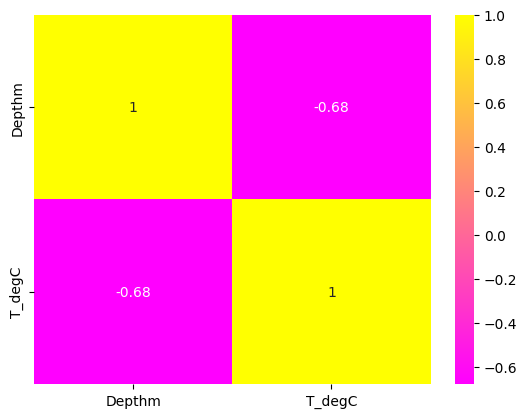

In [211]:
sns.heatmap(path.corr(),cmap='spring', annot=True)

**Observaciones**
Lo que se muestra en la gráfica es que las dos variables tiene una correlacion negativa, es decir que si una aumenta la otra variable va a disminuir, entonces si la profundidad del oceano aumenta la temperatura del agua va a disminuir.

- Una vez realizado esto, lo que sigue es crear las varibales que se utlizaran para las pruebas y entranmiento del modelo de regresion lineal. 

In [212]:
#Crear un conjunto de datos de pueba y de entrenamiento
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=42) 
#Lo que hace es tomar las dos columnas para despues particionarlas con 20% para las pruebas

## Modelo de regresion lineal

Es un modelo lineal que realiza el proceso de seleccion de variables y su regularización con el objetivo de aumentar la exactitud e interpretabilidad.

- Como primer paso, se tiene que realizar la importación de la libreria que tiene el modelo de la regresion lineal

In [213]:

from sklearn import linear_model

### Construye un modelo de regresión base utilizando cualquier algoritmo de regresión de tu elección. (5 puntos)

- Una vez realizado esto, lo siguiente es crear una instancia del modelo de regresion lineal Lasso

In [214]:
#Se crea un objeto del modelo 
reg_lin = linear_model.LinearRegression()

In [215]:
#Se entrena el modelo con los datos
reg_lin.fit(X_train, y_train)

LinearRegression()

In [269]:
#Se realizan las predicciones 
y_pred1 = reg_lin.predict(X_test)

In [275]:
accaD1 = reg_lin.score(X_test, y_test)

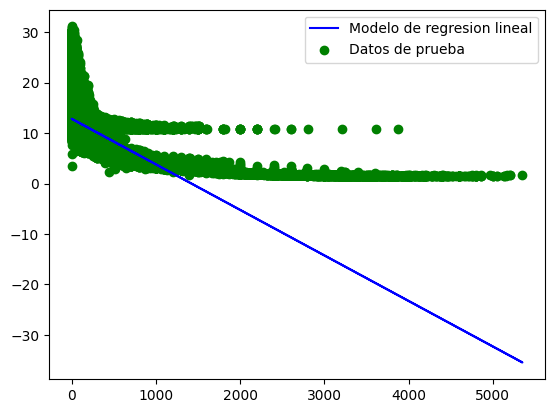

In [270]:
#Se genera la linea que predice 
plt.plot(X_test,y_pred1, label="Modelo de regresion lineal", color="b")
plt.scatter(X_test, y_test, label="Datos de prueba", color="g")
plt.legend()
plt.show()

In [272]:
x_new=[[10]]
reg_lin.predict(x_new)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.75929811])

In [273]:
x_new=[[1000]]
reg_lin.predict(x_new)

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.81921327])

El score del modelo indica un porcentaje de 1

### Proporcione una breve descripción del algoritmo y sus suposiciones. (5 puntos)

- Una ves realizado el procedimiento de crear la instacia, el entrenamiento y las predicciones con el modelo de regresion lineal Lasso. Donde se prentende entrenar el modelo para que prediga cual es la temperatura del oceano deacuerdo con la profundidad del mismo oceano. Algunas predicciones que se realizaron, fueron de una profundidad de 10 se predice que su temperatura sea de 12.74 grados y la otra predicción es de una profundidad de 1000 se predice que su temperatura sea de 3.79 grados.

### Realice una validación cruzada utilizando una validación cruzada de 5 veces (5 puntos) e informe la media y la desviación estándar de las puntuaciones de validación cruzada (5 puntos).

In [179]:
from sklearn.model_selection import GridSearchCV

In [233]:
grid = {
    'fit_intercept': [True, False], 
    'copy_X': [True, False],
    'positive': [True, False]
} #Este diccionario va a jugar con los distintos valores para a la hora de evaluar el modelo.

In [234]:

ModelR= GridSearchCV(estimator=linear_model.LinearRegression(),param_grid=grid, cv=5)
ModelR.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]})

In [235]:
ModelR.best_params_

{'copy_X': True, 'fit_intercept': True, 'positive': False}

In [259]:
accAD=ModelR.best_score_
accAD

0.4581534136372568

In [238]:
print('Promedio y desviación estándar:  %.1f (%.1f)' % (100*np.mean(accAD),100*np.std(accAD)))

Promedio y desviación estándar:  45.8 (0.0)


### Explique por qué la validación cruzada es importante para evaluar el rendimiento de su modelo. (5 puntos)


- La validación cruzada es importante ya que nos permite hacer un analisis de los scores de cada modelo que se esta generando con la finalidad de encontrar un modelo que tenga un porcertange de score mas alto con los distintos parametros que se le pueden aplicar al modelo de regresion lineal 

### Ajuste los hiperparámetros de su modelo de regresión mediante la búsqueda en malla. (5 puntos)

In [252]:
ModelR2 = linear_model.LinearRegression(copy_X= True, fit_intercept= True, positive=False)

In [257]:
reg_lin.fit(X_train, y_train)

LinearRegression()

In [258]:
#Se realizan las predicciones 
y_pred = ModelR2.predict(X_test)
ModelR2.score(X_test, y_test)

0.4610998702420457

### Explica los hiperparámetros que ajustaron, el rango de valores que consideraron y la razón detrás de esas elecciones. (5 puntos)

- El rango de los valores de los parametros que se dieron fueron de tipo booleano, asi que se implemento las dos opciones. La razon de por que se eligieron estos parametros, son copy_X este con la finalidad de que mantenga los datos originales en caso de que se modifique los datos. fit_intercept se eligio para poder ajustarse a una intercepción para el modelo y es importante ya que permite al modelo ajustar una línea de regresión que no necesariamente pasa por el origen. positive este parámetro indica si los coeficientes deben ser forzados a ser positivos. En este caso, se estableció en False, lo que significa que los coeficientes no serán forzados a ser positivos.

### Informa los mejores hiperparámetros que encontró y la puntuación de validación cruzada correspondiente. (5 puntos)

In [260]:
best=ModelR.best_params_
best

{'copy_X': True, 'fit_intercept': True, 'positive': False}

In [262]:
scoreM=ModelR.best_score_
scoreM

0.4581534136372568

### Compare el rendimiento de su modelo de regresión ajustado con el modelo base y explique cualquier diferencia que haya observado. (5 puntos)

In [ ]:
ddff= pd.DataFrame(list(zip(accaD1,accAD)),columns=["default","ajustado"])
ddff

In [ ]:
ddff.plot(kind='box')
plt.title('Arbol de desicion: exactitud (accuracy)')
plt.show()

- Como se puede observar los scores que arrojan son el mismo puntaje. 

## Conjunto de datos 2

In [277]:
#Importamos las librerias necesarias para el funcionamiento
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [278]:
#Cargamos el modelo que contiene los datos.
df_data=pd.read_csv("data.csv")

In [288]:
#Mostramos los primeros 5 registros.
df_data.head(5)

,Age,Duration,Frequency,Location,Character,Intensity,Nausea,Vomit,Phonophobia,Photophobia,...,Vertigo,Tinnitus,Hypoacusis,Diplopia,Defect,Ataxia,Conscience,Paresthesia,DPF,Type
0,30,1,5,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
1,50,3,5,1,1,3,1,1,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
2,53,2,1,1,1,2,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Typical aura with migraine
3,45,3,5,1,1,3,1,0,1,1,...,1,0,0,0,0,0,0,0,0,Typical aura with migraine
4,53,1,1,1,1,2,1,0,1,1,...,0,0,0,0,0,0,0,0,1,Typical aura with migraine


In [280]:
#Mostramos la informacion de los campos de la tabla.
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          400 non-null    int64 
 1   Duration     400 non-null    int64 
 2   Frequency    400 non-null    int64 
 3   Location     400 non-null    int64 
 4   Character    400 non-null    int64 
 5   Intensity    400 non-null    int64 
 6   Nausea       400 non-null    int64 
 7   Vomit        400 non-null    int64 
 8   Phonophobia  400 non-null    int64 
 9   Photophobia  400 non-null    int64 
 10  Visual       400 non-null    int64 
 11  Sensory      400 non-null    int64 
 12  Dysphasia    400 non-null    int64 
 13  Dysarthria   400 non-null    int64 
 14  Vertigo      400 non-null    int64 
 15  Tinnitus     400 non-null    int64 
 16  Hypoacusis   400 non-null    int64 
 17  Diplopia     400 non-null    int64 
 18  Defect       400 non-null    int64 
 19  Ataxia       400 non-null    

In [281]:
#Vamos a cargar los datos de la variable tarjet que en este caso sera la que muestre los didtintos tipos de migraña que se presentan en los registros.
X = df_data.drop('Type', axis=1)
y = df_data['Type']

In [282]:
#Entrenamos el modelo.
X_train, X_test, y_train, y_test= train_test_split(X,y,train_size=0.6,random_state=45)

## Modelo de clasificación

### Crea un modelo de clasificación base utilizando cualquier algoritmo de clasificación de tu elección. (5 puntos)

- Para poder utilizar el modelo de bosque aleatorio, se tiene que importar su libreria. 

In [283]:
from sklearn.ensemble import RandomForestClassifier

- Despues se crea el modelo base y se corre dentro de un ciclo for.


In [293]:
modelo_AD =  RandomForestClassifier()
modelo_AD.fit(X_train,y_train)


RandomForestClassifier()

- Se crea una variable de prediccion y se le manda como parametro la variable de prueba X_test, la cual va a predecir que tipo de iris es.

In [286]:
y_pred3 = modelo_AD.predict(X_test)

- Con la variable de accurancy permitira saber el porcentaje de predicciones correctas que realiza el modelo que se creo anteriormente. 

In [294]:
accuracy = accuracy_score(y_test,y_pred3)
print("El accuracy es =", accuracy)

El accuracy es = 0.8875


### Proporcione una breve descripción del algoritmo y sus suposiciones. (5 puntos)

- Este modelo de clasificación llamado Bosque aleatorio pasa por el proceso de crear una instancia del mismo modelo para despues entrenarlo con las varaibles que se destienen a el entrenamiento, para despues pasar por una etapa de que realizará las prediccionnes  y obtener su score. Este modelo tiene el objetivo de identificar que tipo de migraña esta sufriendo la persona de acuerdo a distintas caracteristicas que existen.

### Realice una validación cruzada utilizando una validación cruzada de 5 veces (5 puntos) e informe la media y la desviación estándar de las puntuaciones de validación cruzada (5 puntos).

- Se importan las librerias que se ocupan 

In [295]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

- Lo primero que tenemos que hacer es crear nuestra malla de valores para el random forest classifier

In [296]:
grid = {
    'n_estimators': [200,300,400,500],
    'max_features':['sqrt','log2'],
    'max_depth': [4,5,6,7,8],
    'criterion': ['gini','entropy'],
    'random_state': [18]
} #Este diccionario va a jugar con los distintos valores para a la hora de evaluar el modelo.

- Se crea la instancia del modelo 

In [297]:
rf_cv = GridSearchCV(estimator=RandomForestClassifier(),param_grid=grid, cv=5)
rf_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [18]})

- Se puede utilizar el metodo de ".best_params" para obtener los mejores parametros

In [298]:
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 300,
 'random_state': 18}

In [307]:
accAD3=rf_cv.best_score_

In [301]:
print('Promedio y desviación estándar:  %.1f (%.1f)' % (100*np.mean(accAD2),100*np.std(accAD2)))

Promedio y desviación estándar:  87.1 (0.0)


### Explica por qué la validación cruzada es importante para evaluar el rendimiento de tu modelo. (5 puntos)

In [ ]:
#Este modelo realiza lo que es una validacion cruzada,  La validación cruzada es una técnica común 
#en el aprendizaje automático para evaluar el rendimiento de un modelo en una muestra de datos determinada. Es 
#importante para evaluar el rendimiento de nuestro modelo porque permite obtener una estimación más fiable del 
#rendimiento del modelo en nuevos datos no vistos.

### Ajusta los hiperparámetros de su modelo de clasificación mediante la búsqueda en cuadrícula. (5 puntos)

In [303]:
rf2 = RandomForestClassifier(criterion= 'gini', max_depth= 7, max_features= 'sqrt', n_estimators= 300, random_state= 18).fit(X_train,np.ravel(y_train))
y_pred = rf2.predict(X_test)


In [304]:
accuracy_score(y_test, y_pred)

0.86875

In [305]:
confusion_matrix(y_test,y_pred)

array([[  4,   1,   0,   0,   0,   3,   0],
       [  0,   1,   1,   0,   0,   9,   0],
       [  0,   0,  20,   0,   0,   2,   0],
       [  1,   0,   0,   4,   0,   0,   0],
       [  0,   1,   0,   0,   1,   3,   0],
       [  0,   0,   0,   0,   0, 103,   0],
       [  0,   0,   0,   0,   0,   0,   6]])

### Explica los hiperparámetros que ajustó, el rango de valores que consideró y la razón detrás de sus elecciones. (5 puntos)

Para el criterion se eligio  Gini porque es una medida comúnmente utilizada, la max_depth es que es el maximo de profundidad y se dio 7 ya que no se queria sobreajustar el modelo, max_features se dio el valor ya que es el número máximo de características que se consideran es la raíz cuadrada del número total de características, n_estimator se dio 300 ya que se ha fijado para aumentar la precisión del modelo y  el randomstate se eligio ya que se utiliza para inicializar el generador de números aleatorios, lo que garantiza que el modelo se entrenará con los mismos datos en cada ejecución. Los rangos que se consideraron son similares a otro modelo que se utilizo. 

### Informe los mejores hiperparámetros que encontró y la puntuación de validación cruzada correspondiente. (5 puntos)

In [312]:
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 300,
 'random_state': 18}

In [314]:
rf_cv.best_score_

0.8708333333333333

### Evalúa el rendimiento de tu modelo de clasificación ajustado utilizando precisión, recuperación y puntaje F1. (5 puntos)

### Explique el significado de estas métricas y cómo se pueden usar para evaluar el rendimiento de un modelo de clasificación. (5 puntos)

### Compare el rendimiento de tu modelo de clasificación ajustado con el modelo base y explique cualquier diferencia que haya observado. (5 puntos)

In [ ]:
ddff= pd.DataFrame(list(zip(accuracy,accAD3)),columns=["default","ajustado"])
ddff

In [ ]:
ddff.plot(kind='box')
plt.title('Arbol de desicion: exactitud (accuracy)')
plt.show()